# Clase 28 Descenso del gradiente

## Dependencias

In [1]:
from matplotlib import cm # Para manejar colores
import numpy as np
import matplotlib.pyplot as plt

### Gráfica en 3D de nuestra función de coste

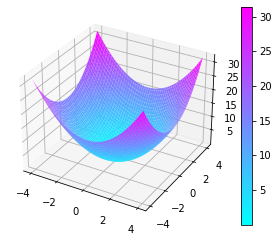

In [2]:
# Se inicializa la grafica la función
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# función a trabajar
def f(x, y):
    return x**2 + y**2

# Número de punto a analizar por variable
res = 100

# Se define los vectores que van a contener la función
x = np.linspace(-4, 4, num=res)
y = np.linspace(-4, 4, num=res)
X, Y = np.meshgrid(x, y)

# Se crea la variable dependiente
Z = f(X, Y)

# Se dibuja la superficie de la función
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool)
#Se agrega la barra lateral de la gráfica
fig.colorbar(surf)


## Descenso del gradiente

Text(0.5, 1.0, 'Descenso del gradiente')

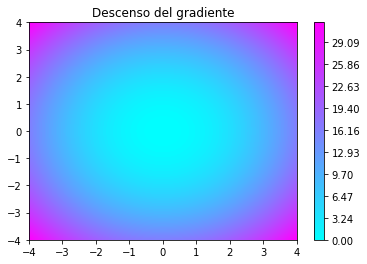

In [3]:
# Se crea las curvas de nivel
level_map = np.linspace(np.min(Z), np.max(Z), num=res)

# Se dibuja el contorno
plt.contourf(X, Y, Z, levels=level_map, cmap=cm.cool)
# Se agrega la barra lateral de la figura
plt.colorbar()
# Se agrega el titulo a la gráfica
plt.title('Descenso del gradiente')

# Clase 29 Aplicando el descenso

Ultimo punto: [-0.005 -0.005]


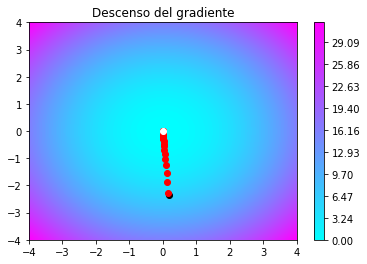

In [11]:
# Se crea las curvas de nivel
level_map = np.linspace(np.min(Z), np.max(Z), num=res)

# Se dibuja el contorno
plt.contourf(X, Y, Z, levels=level_map, cmap=cm.cool)
# Se agrega la barra lateral de la figura
plt.colorbar()
# Se agrega el titulo a la gráfica
plt.title('Descenso del gradiente')

# Se crea un punto aleatorio desde donde comienza el punto a moverse,
# es de anotar que el módulo random.rand devuelve un número entre 0
# y 1, por lo tanto se multiplica por el rango de los valores (8) y se
# resta 4 para que el número este entre -4 y 4
p = np.random.rand(2)*8 - 4

# Se dibuja el punto aleatorio
plt.plot(p[0], p[1], 'o', c='k')

# Incremento
h = 0.01
# Learning Rate
lr = 0.01

# Función que deriva, recibe el punto con el incremento y el punto 
# original
def derivate(cp, p):
    # Note como se escribio la definición como tal de derivada
    return (f(cp[0], cp[1]) - f(p[0], p[1])) / h

# funcion de gradiente
def gradient(p):
    # Inicializa el gradiente
    grad = np.zeros(2)
    # for que pasa primero po x y despues por y
    for idx, val in enumerate(p):
        # Se copia el punto
        cp = np.copy(p)
        # Se incrementa la variable
        cp[idx] = cp[idx] + h

        # Se halla la derivada parcial de la función
        dp = derivate(cp, p)

        # Se halla el gradiente 
        grad[idx] = dp

    return grad

# Proceso iterativo que calcula el punto por medio del descenso del 
# gradiente, entre mayor el range, mas se acerca al punto mas de bajo
# de Z
for i in range(1000):
    p = p - lr*gradient(p)
    # Se grafica cada 10 iteraciones
    if (i % 10 == 0):
        plt.plot(p[0], p[1], 'o', c='r')

# Se grafica el ultimo punto 
plt.plot(p[0], p[1], 'o', c='w')
print('Ultimo punto:', p)

La anterior grafica solo tiene un minimo en toda su función, ahora se halla con una función que tiene varios minimos en su función

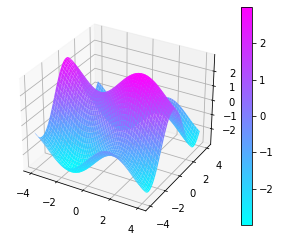

In [12]:
# Se inicializa la grafica la función
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# función a trabajar
def f(x, y):
    return np.sin(x) + 2*np.cos(y)

# Número de punto a analizar por variable
res = 100

# Se define los vectores que van a contener la función
x = np.linspace(-4, 4, num=res)
y = np.linspace(-4, 4, num=res)
X, Y = np.meshgrid(x, y)

# Se crea la variable dependiente
Z = f(X, Y)

# Se dibuja la superficie de la función
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool)
#Se agrega la barra lateral de la gráfica
fig.colorbar(surf)

Ultimo punto: [-1.57579078 -3.14659263]


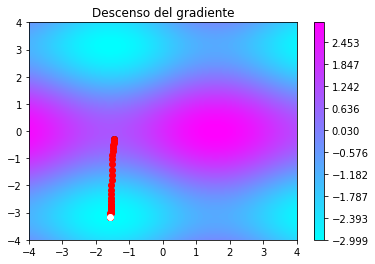

In [15]:
# Se crea las curvas de nivel
level_map = np.linspace(np.min(Z), np.max(Z), num=res)

# Se dibuja el contorno
plt.contourf(X, Y, Z, levels=level_map, cmap=cm.cool)
# Se agrega la barra lateral de la figura
plt.colorbar()
# Se agrega el titulo a la gráfica
plt.title('Descenso del gradiente')

# Se crea un punto aleatorio desde donde comienza el punto a moverse,
# es de anotar que el módulo random.rand devuelve un número entre 0
# y 1, por lo tanto se multiplica por el rango de los valores (8) y se
# resta 4 para que el número este entre -4 y 4
p = np.random.rand(2)*8 - 4

# Se dibuja el punto aleatorio
plt.plot(p[0], p[1], 'o', c='k')

# Incremento
h = 0.01
# Learning Rate
lr = 0.01

# Función que deriva, recibe el punto con el incremento y el punto 
# original
def derivate(cp, p):
    # Note como se escribio la definición como tal de derivada
    return (f(cp[0], cp[1]) - f(p[0], p[1])) / h

# funcion de gradiente
def gradient(p):
    # Inicializa el gradiente
    grad = np.zeros(2)
    # for que pasa primero po x y despues por y
    for idx, val in enumerate(p):
        # Se copia el punto
        cp = np.copy(p)
        # Se incrementa la variable
        cp[idx] = cp[idx] + h

        # Se halla la derivada parcial de la función
        dp = derivate(cp, p)

        # Se halla el gradiente 
        grad[idx] = dp

    return grad

# Proceso iterativo que calcula el punto por medio del descenso del 
# gradiente, entre mayor el range, mas se acerca al punto mas de bajo
# de Z
for i in range(1000):
    p = p - lr*gradient(p)
    # Se grafica cada 10 iteraciones
    if (i % 10 == 0):
        plt.plot(p[0], p[1], 'o', c='r')

# Se grafica el ultimo punto 
plt.plot(p[0], p[1], 'o', c='w')
print('Ultimo punto:', p)

Cuando se tiene varios minimos, la función del descenso del gradiente siempre cambia su lugar, dependiendo de donde se comienze el punto de evaluación.